In [11]:
import cv2 
import numpy as np
import math
#import isect_segments_bentley_ottmann.poly_point_isect as bot
import matplotlib.pyplot as plt

img = cv2.imread(r'C:\Users\Asus\Documents\Python\test_im.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

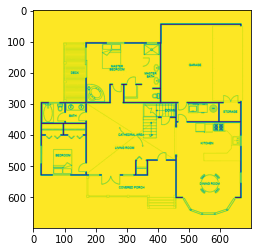

In [12]:
plt.imshow(gray)

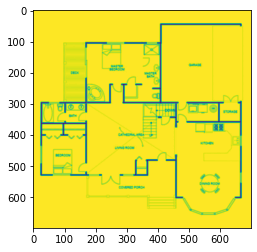

In [13]:
plt.imshow(blur_gray)

In [19]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [15]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
#print(lines)

points = []
for line in lines:
    for x1, y1, x2, y2 in line:
        points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

(700, 700, 3)


True

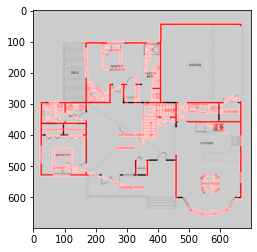

In [16]:
# Draw the lines on the  image
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)
print(lines_edges.shape)
cv2.imwrite('line_parking.png', lines_edges)


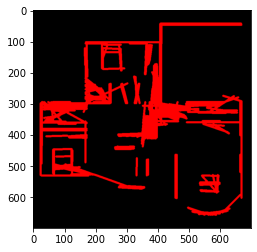

In [17]:
plt.imshow(line_image)